## Notebook to produce Figure 8 for Chiacchierini et al. (2021)

![Figure 8](./figs/PPP_figs_R2_Fig8.png "Figure 8")

In [1]:
import sys
sys.path.append('..\\helperfx')

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.lines as mlines
import matplotlib.transforms as transforms

import dabest as db
import pandas as pd
import trompy as tp

from settings4figs import *
from fx4figs import *

%matplotlib inline

In [2]:
#Adds control column for calculating vs. 50%
con = [0.5] * 15
df_behav.insert(0, "control", con)

#Initializes details for saving statistics
stats_args = {}
stats_args["file"] = "..\\stats\\estimation_stats.xlsx"
stats_args["file"] = "" # Comment this line out to write a new stats file

# with pd.ExcelWriter(stats_args["file"]) as writer:
#     df_behav["control"].to_excel(writer, sheet_name="front")

In [3]:
epoch = [100, 149]

behavkeys = keys = ['pref1', 'pref2', 'pref3']

photokeys = [['pref1_cas_licks_forced', 'pref1_malt_licks_forced'],
        ['pref2_cas_licks_forced', 'pref2_malt_licks_forced'],
        ['pref3_cas_licks_forced', 'pref3_malt_licks_forced']]

### Panel A - Pref over days for NR to PR rats

No stats file to write to.


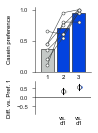

In [4]:
stats_args["sheet"] = "summary_nr"
data, df = prep4estimationstats_summary(df_behav, ["NR"], behavkeys)
fig8A = barscatter_plus_estimation_summary(data, df, colors="control", ylabel="Casein preference", stats_args=stats_args)

### Panel B - Photometry over days for NR to PR rats

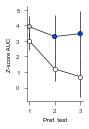

In [5]:
keys = [['pref1_cas_licks_forced', 'pref1_malt_licks_forced'],
        ['pref2_cas_licks_forced', 'pref2_malt_licks_forced'],
        ['pref3_cas_licks_forced', 'pref3_malt_licks_forced']]
fig8B = summary_subfig_casmalt(df_photo, "NR", photokeys)

### Panel C - Photometry vs. behavior for NR to PR rats

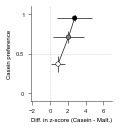

In [6]:
fig8C = summary_subfig_correl(df_behav, df_delta, 'NR', use_zscore_diff=True)

### Panel D - Pref over days for PR to NR rats

No stats file to write to.


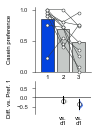

In [7]:
stats_args["sheet"] = "summary_pr"
data, df = prep4estimationstats_summary(df_behav, ["PR"], behavkeys)
fig8D = barscatter_plus_estimation_summary(data, df, colors="expt", ylabel="Casein preference", stats_args=stats_args)

### Panel E - Photometry over days for PR to NR rats

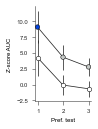

In [8]:
keys = [['pref1_cas_licks_forced', 'pref1_malt_licks_forced'],
        ['pref2_cas_licks_forced', 'pref2_malt_licks_forced'],
        ['pref3_cas_licks_forced', 'pref3_malt_licks_forced']]
fig8E = summary_subfig_casmalt(df_photo, "PR", photokeys)

### Panel F - Photometry vs. behavior for PR to NR rats

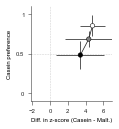

In [9]:
fig8F = summary_subfig_correl(df_behav, df_delta, 'PR', use_zscore_diff=True)

### Panel G - Individual rat-by-rat comparisons

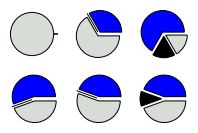

In [10]:
s10_NR = get_proportions(df_pies, "s10", "NR")
s10_PR = get_proportions(df_pies, "s10", "PR")

s11_NR = get_proportions(df_pies, "s11", "NR")
s11_PR = get_proportions(df_pies, "s11", "PR")

s16_NR = get_proportions(df_pies, "s16", "NR")
s16_PR = get_proportions(df_pies, "s16", "PR")

fig8G, ax = plt.subplots(ncols=3, nrows=2, figsize=(3, 2))

makepie(s10_NR, ax[0][0])
makepie(s10_PR, ax[1][0])

makepie(s11_NR, ax[0][1])
makepie(s11_PR, ax[1][1])

makepie(s16_NR, ax[0][2])
makepie(s16_PR, ax[1][2])